### 求出第一主成分以后，如何求出下一个主成分？
#### 数据进行行改变，将数据在第一个主成分上的分量量去掉
#### 在新的数据上求第一主成分

#### ||Xp|| = X.w
#### Xp = ||Xp|| .w
#### X2 = X - Xp

In [1]:
import numpy as np
import matplotlib.pyplot as plt

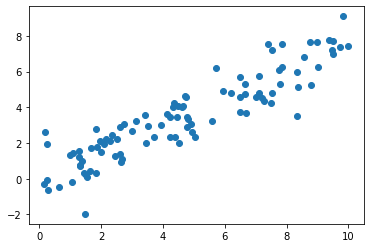

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0, 10, 100)
X[:, 1] = 0.75 * X[:, 0] + np.random.normal(0, 1, size=100)
plt.scatter(X[:, 0], X[:, 1])

In [3]:
# 均值归零
def demean(X):
    return X - np.mean(X, axis=0)

# 方差的计算公式
def f_pca(X, w):
    return np.sum(X.dot(w) ** 2) / len(X) 

# 方差最大时的导数
def df_math(X, w):
    return X.T.dot(X.dot(w)) * 2 / len(X)

# 单位向量
def direction(w):
    return w / np.linalg.norm(w)

# 求主成分
def first_component(X, w, eta=0.01, epsilon=1e-8, n_iters=1e4):
    i_iter = 1
    w = direction(w)
    
    while i_iter < n_iters:
        gradient = df_math(X, w)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if abs(f_pca(X, last_w) - f_pca(X, w)) < epsilon:
            break
        i_iter = i_iter + 1
    
    return w

# 求前n个主成分
def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [4]:
first_n_components(2, X)

[array([0.77782414, 0.62848198]), array([ 0.6291569 , -0.77727833])]

In [5]:
w1, w2 = first_n_components(2, X)
w1,w2

(array([0.77782405, 0.6284821 ]), array([ 0.62915786, -0.77727755]))

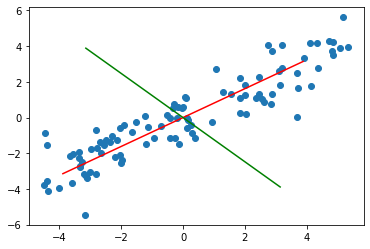

In [9]:
X_demean = demean(X)
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([w1[0]*-5, w1[0], w1[0]*5], [w1[1]*-5, w1[1], w1[1]*5], color="r")
plt.plot([w2[0]*-5, w2[0], w2[0]*5], [w2[1]*-5, w2[1], w2[1]*5], color="g")
plt.show()

In [7]:
w1.dot(w2)

0.0008690891158370517